In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

In [4]:
datos_1 = pd.read_excel('intento_1.xlsx')
datos_2 = pd.read_excel('intento_2.xlsx')
datos_3 = pd.read_excel('intento_3.xlsx')
datos_4 = pd.read_excel('intento_4.xlsx')
datos_5 = pd.read_excel('intento_5.xlsx')
datos_6 = pd.read_excel('intento_6.xlsx')
datos_7 = pd.read_excel('intento_7.xlsx')
datos_8 = pd.read_excel('intento_8.xlsx')
datos_9 = pd.read_excel('intento_9.xlsx')

In [24]:
y_1 = datos_1['x']
x_1 = datos_1['t']
x_2 = datos_2['t']
y_2 = datos_2['x']
x_3 = datos_3['t']
y_3 = datos_3['x']
x_4 = datos_4['t']
y_4 = datos_4['x']
x_5 = datos_5['t']
y_5 = datos_5['x']
x_6 = datos_6['t']
y_6 = datos_6['x']
x_7 = datos_7['t']
y_7 = datos_7['x']
x_8 = datos_8['t']
y_8 = datos_8['x']
x_9 = datos_9['t']
y_9 = datos_9['x']

In [33]:
t_1 = np.max(x_1)
t_2 = np.max(x_2)
t_3 = np.max(x_3)
t_4 = np.max(x_4)
t_5 = np.max(x_5)
t_6 = np.max(x_6)
t_7 = np.max(x_7)
t_8 = np.max(x_8)
t_9 = np.max(x_9)

tabla = pd.DataFrame({'video': [1,2,3,4,5,6,7,8,9] ,'masa (g)':[5.9,15.8,25.6,25.8,55.7,105.2,35.7,65.6,75.5] ,'tiempo (s)': [t_1, t_2, t_3, t_4, t_5, t_6, t_7, t_8, t_9]})
tabla

,video,masa (g),tiempo (s)
0,1,5.9,3.900000
1,2,15.8,1.566667
2,3,25.6,1.333333
3,4,25.8,1.300000
4,5,55.7,0.900000
5,6,105.2,0.700000
6,7,35.7,1.066667
7,8,65.6,0.800000
8,9,75.5,0.766667


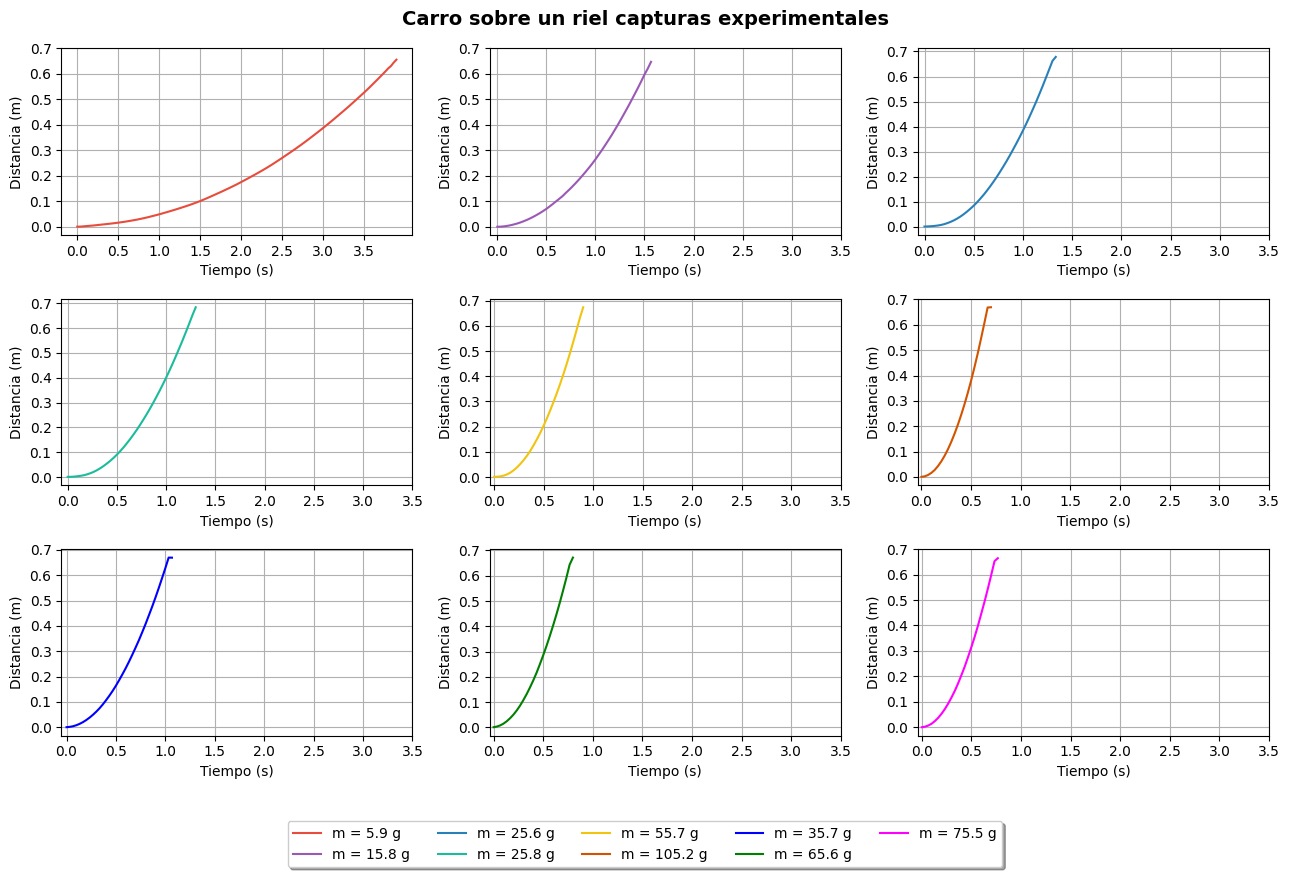

In [25]:
# rel_vectores
fig = plt.figure(figsize=(13, 8), layout='tight')
fig.suptitle('Carro sobre un riel capturas experimentales', fontsize=14, fontweight='bold')
spec = fig.add_gridspec(3,3)
ax1 =fig.add_subplot(spec[0,0])
ax1.plot(x_1, y_1, color=(231/255,76/255,60/255), label='m = 5.9 g')
ax1.set_xticks(np.arange(0, 4, 0.5))
ax1.set_yticks(np.arange(0, 0.8, 0.1))
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Distancia (m)')
ax1.grid(True)
ax2 = fig.add_subplot(spec[0,1])
ax2.plot(x_2, y_2, color=(155/255, 89/255, 182/255), label='m = 15.8 g')
ax2.set_xticks(np.arange(0, 4, 0.5))
ax2.set_yticks(np.arange(0, 0.8, 0.1))
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Distancia (m)')
ax2.grid(True)
ax3 = fig.add_subplot(spec[0,2])
ax3.plot(x_3, y_3, color='#2980b9', label='m = 25.6 g')
ax3.set_xticks(np.arange(0, 4, 0.5))
ax3.set_yticks(np.arange(0, 0.8, 0.1))
ax3.set_xlabel('Tiempo (s)')
ax3.set_ylabel('Distancia (m)')
ax3.grid(True)
ax4 = fig.add_subplot(spec[1,0])
ax4.plot(x_4, y_4, color='#1abc9c', label='m = 25.8 g')
ax4.set_xticks(np.arange(0, 4, 0.5))
ax4.set_yticks(np.arange(0, 0.8, 0.1))
ax4.set_xlabel('Tiempo (s)')
ax4.set_ylabel('Distancia (m)')
ax4.grid(True)
ax5 =fig.add_subplot(spec[1,1])
ax5.plot(x_5, y_5, color='#f1c40f', label='m = 55.7 g')
ax5.set_xticks(np.arange(0, 4, 0.5))
ax5.set_yticks(np.arange(0, 0.8, 0.1))
ax5.set_xlabel('Tiempo (s)')
ax5.set_ylabel('Distancia (m)')
ax5.grid(True)
ax6 =fig.add_subplot(spec[1,2])
ax6.plot(x_6, y_6, color='#d35400', label='m = 105.2 g')
ax6.set_xticks(np.arange(0, 4, 0.5))
ax6.set_yticks(np.arange(0, 0.8, 0.1))
ax6.set_xlabel('Tiempo (s)')
ax6.set_ylabel('Distancia (m)')
ax6.grid(True)
ax7 = fig.add_subplot(spec[2,0])
ax7.plot(x_7, y_7, color='blue', label='m = 35.7 g')
ax7.set_xticks(np.arange(0, 4, 0.5))
ax7.set_yticks(np.arange(0, 0.8, 0.1))
ax7.set_xlabel('Tiempo (s)')
ax7.set_ylabel('Distancia (m)')
ax7.grid(True)
ax8 = fig.add_subplot(spec[2,1])
ax8.plot(x_8, y_8, color='green', label='m = 65.6 g')
ax8.set_xticks(np.arange(0, 4, 0.5))
ax8.set_yticks(np.arange(0, 0.8, 0.1))
ax8.set_xlabel('Tiempo (s)')
ax8.set_ylabel('Distancia (m)')
ax8.grid(True)
ax9 = fig.add_subplot(spec[2,2])
ax9.plot(x_9, y_9, color='magenta', label='m = 75.5 g')
ax9.set_xticks(np.arange(0, 4, 0.5))
ax9.set_yticks(np.arange(0, 0.8, 0.1))
ax9.set_xlabel('Tiempo (s)')
ax9.set_ylabel('Distancia (m)')
ax9.grid(True)
fig.legend(loc='lower center',bbox_to_anchor=(0.5, -0.1), ncol=5,shadow=True, fancybox=True)
# plt.savefig('relacion_vectores.png', dpi = 300, bbox_inches = 'tight')
plt.savefig('carro_sobre_riel_datos_experimentales.png', dpi = 300, bbox_inches = 'tight')
plt.show()